### Recap

Previously, we took an early look at the data and started evaluating models using only five features. Our naive baseline is set at 0.6616 which is not matched by the early baselines. The metrics are captured below.

| Metrics | K Nearest Neighbor | Logistic Regression | Gaussian Naive Bayes | Support Vector Machine | Decision Tree | Random Forest | 
| ----: | :----: | :----: | :----: | :----: | :----: | :----: |
| **Accuracy** | 0.595220 | 0.661384 | 0.661384 | 0.661384 | 0.610965 | 0.619717 |
| **Precision** | 0.694881 | 0.661384 | 0.661384 | 0.661384 | 0.704984 | 0.698451 |
| **Recall** | 0.819655 | 1.000000 | 1.000000 | 1.000000 | 0.923297 | 0.937549 | 
| **F1** | 0.752129 | 0.796184 | 0.796184 | 0.796184 | 0.799505 | 0.800528 | 

Since the last notebook, I have written a Python function that will convert the many text values to the numbers needed for analysis. The below data ingestion and conversion is the same as the first notebook.

Since a part of the audience (HR departments) would appreciate some analysis into what factors play into job satisfaction and prioritizing intervention efforts, I will pursue logistic regression first. This model has high interpretability and provides insight into probabilities that might be useful for the audience.

### Getting data into the notebook

In [1]:
import pandas as pd
import stackoverflow_helper as soh
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
raw_import = pd.read_csv('/Users/pang/repos/stack-overflow-survey/_data/developer_survey_2019/survey_results_public.csv', \
                         index_col='Respondent')

In [3]:
# The same dataframe as in the first notebook.
df = soh.get_analysis_data(raw_import)

# The same rows (observations) as above, 
# but only the columns that have yet to be evaulated for addition into the model.
unused = soh.unused_data(raw_import)

In [4]:
y = df['JobSat']
X = df.drop(columns='JobSat')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

At this point we are caught up to the previous notebook. Additional analysis/model tuning is next.

### Review current features

In [5]:
import matplotlib.pyplot as plt

In [ ]:
unused['Dependents'].isnull().any()

In [109]:
unused['OpenSource'].value_counts()

The quality of OSS and closed source software is about the same                    26287
OSS is, on average, of HIGHER quality than proprietary / closed source software    22802
OSS is, on average, of LOWER quality than proprietary / closed source software      5165
Name: OpenSource, dtype: int64

In [76]:
booo = unused[unused['ConvertedComp'] > 90]
booo['WorkWeekHrs'].head(50)

Respondent
151      160.0
238       98.0
485      160.0
581      100.0
617      375.0
1116     160.0
1125     375.0
1507     160.0
1697     385.0
1776     160.0
1819     375.0
2058     140.0
2064     168.0
2145     475.0
2215     168.0
2226     375.0
2241     168.0
2430     385.0
2567     160.0
2954     375.0
2956     160.0
3017     375.0
3804     375.0
3894     385.0
4080     385.0
4133     160.0
4324     160.0
4593     150.0
5330     168.0
5532     375.0
5698    1012.0
5877     160.0
5955     375.0
6114     375.0
6173     375.0
6251     168.0
6385     113.0
6498     160.0
6614     160.0
6802     395.0
6985     385.0
7432     375.0
7503     160.0
8070     100.0
8375     375.0
8421     375.0
8707     375.0
8728     375.0
8853     375.0
8867     385.0
Name: WorkWeekHrs, dtype: float64

In [64]:
view_df.columns

Index(['OpenSource', 'Country', 'EdLevel', 'UndergradMajor', 'EduOther',
       'DevType', 'Age1stCode', 'YearsCodePro', 'LastInt', 'JobFactors',
       'ResumeUpdate', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn',
       'SocialMedia', 'Extraversion', 'ScreenName', 'SOVisit1st', 'SOVisitTo',
       'SOFindAnswer', 'SOTimeSaved', 'SOHowMuchTime', 'SOAccount'],
      dtype='object')

In [108]:
view_df =  unused.drop(columns = ['Student', 'Dependents', 'Age', 
                                  'CareerSat', 'JobSat', 'OrgSize', 
                                  'MgrWant', 'MgrMoney', 'JobSeek', 'ConvertedComp',
                                  'Gender', 'Sexuality', 'Ethnicity', 'Trans',
                                  'SurveyEase', 'SurveyLength', 'SONewContent', 'WelcomeChange', 'SOComm',
                                  'EntTeams', 'SOJobs', 'SOPartFreq', 'FizzBuzz',
                                  'PurchaseWhat'
                                 ])
view_df

,OpenSource,Country,EdLevel,UndergradMajor,EduOther,DevType,Age1stCode,YearsCodePro,LastInt,JobFactors,...,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount
Respondent,,,,,,,,,,,,,,,,,,,,,
4,The quality of OSS and closed source software ...,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,"Developer, full-stack",16,Less than 1 year,"Write code by hand (e.g., on a whiteboard);Int...","Languages, frameworks, and other technologies ...",...,Yes,Reddit,In real life (in person),Username,2014,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes
5,"OSS is, on average, of HIGHER quality than pro...",Ukraine,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,"Academic researcher;Developer, desktop or ente...",14,9,"Write any code;Write code by hand (e.g., on a ...","Industry that I'd be working in;Languages, fra...",...,Yes,Facebook,In real life (in person),Username,I don't remember,Find answers to specific questions,More than 10 times per week,Stack Overflow was much faster,NaN,Yes
9,The quality of OSS and closed source software ...,New Zealand,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,"Database administrator;Developer, back-end;Dev...",11,4,Write any code;Interview with people in peer r...,Financial performance or funding status of the...,...,Yes,Twitter,In real life (in person),Username,2013,Find answers to specific questions;Contribute ...,3-5 times per week,They were about the same,NaN,Yes
10,"OSS is, on average, of HIGHER quality than pro...",India,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,NaN,Data or business analyst;Data scientist or mac...,20,10,NaN,"Languages, frameworks, and other technologies ...",...,Yes,YouTube,Neither,Screen Name,NaN,Find answers to specific questions;Get a sense...,3-5 times per week,They were about the same,NaN,Yes
13,"OSS is, on average, of HIGHER quality than pro...",United States,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,Data or business analyst;Database administrato...,11,8,Complete a take-home project;Interview with pe...,"Languages, frameworks, and other technologies ...",...,Yes,Twitter,In real life (in person),Username,2011,Find answers to specific questions,More than 10 times per week,Stack Overflow was much faster,11-30 minutes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88878,The quality of OSS and closed source software ...,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,"Developer, back-end;Developer, front-end;Devel...",14,3,"Write any code;Write code by hand (e.g., on a ...","Languages, frameworks, and other technologies ...",...,Yes,Twitter,Online,Username,2010,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,0-10 minutes,Yes
88879,The quality of OSS and closed source software ...,Finland,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...","Developer, desktop or enterprise applications;...",16,7,Complete a take-home project;Interview with pe...,"Languages, frameworks, and other technologies ...",...,NaN,YouTube,Neither,Username,I don't remember,Find answers to specific questions,Less than once per week,Stack Overflow was slightly faster,60+ minutes,No
88881,"OSS is, on average, of HIGHER quality than pro...",Austria,"Master’s degree (MA, MS

In [110]:
new_values ={
    'JobSat' : {
        'Very satisfied' : 1,
        'Slightly satisfied' : 1,
        'Slightly dissatisfied' : 0,
        'Very dissatisfied' : 0,
        'Neither satisfied nor dissatisfied' : 0
    },   
    'Student' : {
        'No' : 0,
        'Yes, full-time' : .5,
        'Yes, part-time' : 1
    },
    'Dependents' : {
        'Yes' : 1,
        'No' : 0
    },
    'MgrMoney' : {
        'Not sure' : 0.5,
        'Yes' : 1,
        'No' : 0
    },
    'OrgSize' : {
        '20 to 99 employees' : 20,
        '100 to 499 employees' : 100,
        '10,000 or more employees' : 10000,
        '1,000 to 4,999 employees' : 1000,
        '10 to 19 employees': 10,
        '2-9 employees' : 2,
        '500 to 999 employees' : 500,
        '5,000 to 9,999 employees' : 5000,
        'Just me - I am a freelancer, sole proprietor, etc.' : 0
    },
    'MgrWant' : {
        'Not sure' : .5,
        'No' : 0,
        'Yes' : 1,
        'I am already a manager' : 0
    },
    'SOPartFreq' : {
        'Less than once per month or monthly' : 1,
        'I have never participated in Q&A on Stack Overflow' : 0,
        'A few times per month or weekly' : 5,
        'A few times per week' : 10,
        'Daily or almost daily' : 20,
        'Multiple times per day' : 40
    },
    'MgrMoney' : {
        'No' : 0,
        'Yes' : 1,
        'Not sure' : .5
    },
    'PurchaseWhat' : {
        'I have little or no influence' : 0,
        'I have some influence' : .5,
        'I have a great deal of influence' : 1
    },
    'OpenSource' : {
        'The quality of OSS and closed source software is about the same' : .5,
        'OSS is, on average, of HIGHER quality than proprietary / closed source software' : 1,
        'OSS is, on average, of LOWER quality than proprietary / closed source software' : 0
    }

}

In [111]:
new = soh.replace_data(unused, new_values)
for column in ['Age', 'ConvertedComp']:
    new[column] = unused[column]

In [112]:
uy = new['JobSat']
uX = new.drop(columns='JobSat')
X_train, X_test, y_train, y_test = train_test_split(uX, uy, test_size=0.30, random_state=4444)

In [113]:
X_train = X_train.fillna(X_train.mean())

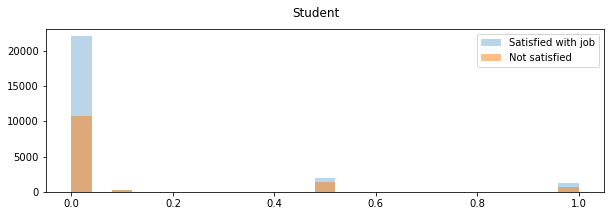

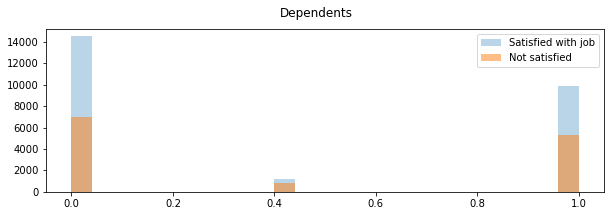

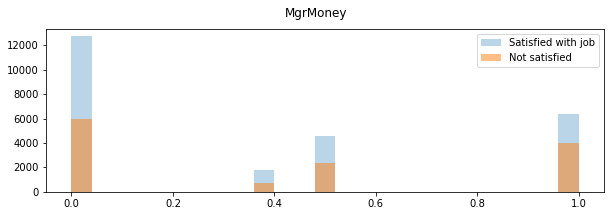

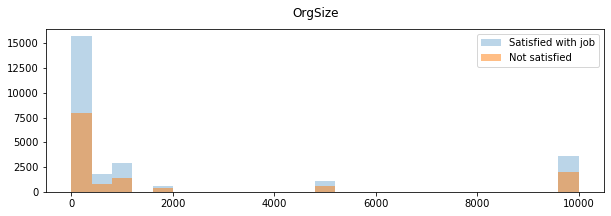

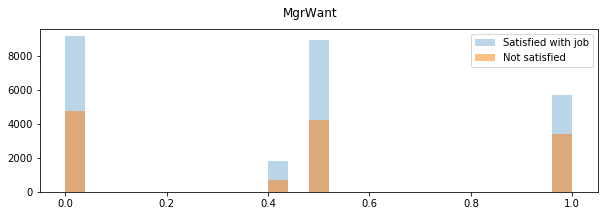

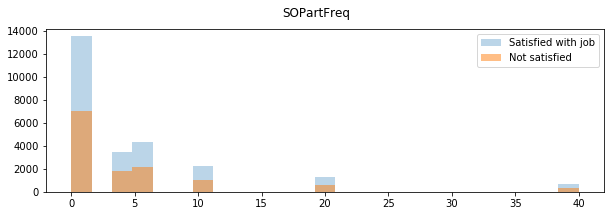

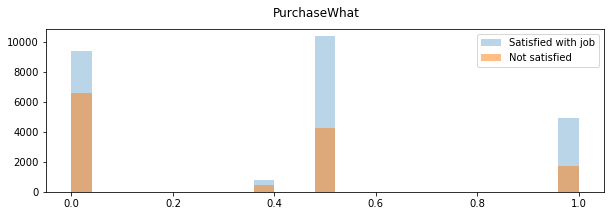

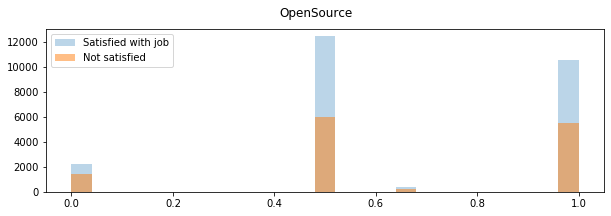

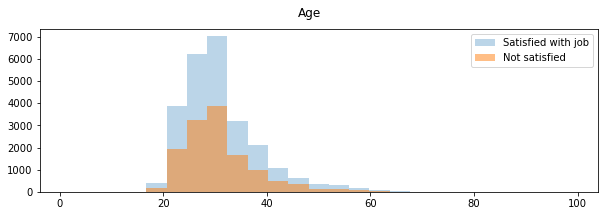

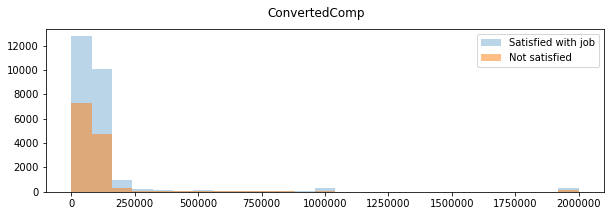

In [114]:
for col in X_train.columns:
    fig, ax = plt.subplots(1, 1, figsize=(10, 3))  # 3 Rows, 1 Col

    plt.hist(X_train.loc[(y_train==1), col], bins=25, alpha=.3, label='Satisfied with job')
    plt.hist(X_train.loc[(y_train==0), col], bins=25, alpha=.5, label='Not satisfied')

    plt.legend();
    plt.suptitle(col);

In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(new, kind='scatter', diag_kind='kde');

In [ ]:
unused

### Splitting set

In [6]:
# Evaluating models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [7]:
y = df['JobSat']
X = df.drop(columns='JobSat')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

### See what fits on the models

In [8]:
#knn = KNeighborsClassifier()
#knn.fit(X_train, y_train)

lr = LogisticRegression(solver= 'liblinear')
lr.fit(X_train, y_train)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

#svc = SVC(gamma='scale')
#svc.fit(X_train, y_train)

#rfc = RandomForestClassifier(n_estimators=10)
#rfc.fit(X_train, y_train)

#dtc = DecisionTreeClassifier()
#dtc.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
classifier_scores = {}

for name, classifier in [('Logistic Regression',lr), 
                         ('Gaussian Naive Bayes',gnb)]:
    accuracy = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
    precision = precision_score(y_train,classifier.predict(X_train))
    recall = recall_score(y_train,classifier.predict(X_train))
    f1 = f1_score(y_train,classifier.predict(X_train))
    
    classifier_scores[name] = {
        'Accuracy' : accuracy.mean(),
        'Precision' : precision,
        'Recall' : recall,
        'F1' : f1
    }

scores = pd.DataFrame(classifier_scores)
scores

,Logistic Regression,Gaussian Naive Bayes
Accuracy,0.695256,0.694401
Precision,0.711983,0.709726
Recall,0.906147,0.909749
F1,0.797416,0.797385


| Metrics | K Nearest Neighbor | Logistic Regression | Gaussian Naive Bayes | Support Vector Machine | Decision Tree | Random Forest | 
| ----: | :----: | :----: | :----: | :----: | :----: | :----: |
| **Accuracy** | 0.595220 | 0.661384 | 0.661384 | 0.661384 | 0.610965 | 0.619717 |
| **Precision** | 0.694881 | 0.661384 | 0.661384 | 0.661384 | 0.704984 | 0.698451 |
| **Recall** | 0.819655 | 1.000000 | 1.000000 | 1.000000 | 0.923297 | 0.937549 | 
| **F1** | 0.752129 | 0.796184 | 0.796184 | 0.796184 | 0.799505 | 0.800528 | 

In [ ]:
69, 70,90,79

In [ ]:
classifier_scores = {}

for name, classifier in [('K Nearest Neighbor', knn), 
                         ('Logistic Regression',lr), 
                         ('Gaussian Naive Bayes',gnb), 
                         ('Support Vector Machine',svc), 
                         ('Decision Tree',dtc), 
                         ('Random Forest',rfc)]:
    accuracy = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
    precision = precision_score(y_train,classifier.predict(X_train))
    recall = recall_score(y_train,classifier.predict(X_train))
    f1 = f1_score(y_train,classifier.predict(X_train))
    
    classifier_scores[name] = {
        'Accuracy' : accuracy.mean(),
        'Precision' : precision,
        'Recall' : recall,
        'F1' : f1
    }

scores = pd.DataFrame(classifier_scores)
scores